In [1]:
%matplotlib inline

import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(battery):
    mat = loadmat('battery_dataset/1. BatteryAgingARC-FY08Q4/' + battery + '.mat')
    print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
    counter = 0
    dataset = []
    capacity_data = []
  
    for i in range(len(mat[battery][0, 0]['cycle'][0])):
        row = mat[battery][0, 0]['cycle'][0, i]
        if row['type'][0] == 'discharge':
            ambient_temperature = row['ambient_temperature'][0][0]
            date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
            data = row['data']
            capacity = data[0][0]['Capacity'][0][0]
            for j in range(len(data[0][0]['Voltage_measured'][0])):
                voltage_measured = data[0][0]['Voltage_measured'][0][j]
                current_measured = data[0][0]['Current_measured'][0][j]
                temperature_measured = data[0][0]['Temperature_measured'][0][j]
                current_load = data[0][0]['Current_load'][0][j]
                voltage_load = data[0][0]['Voltage_load'][0][j]
                time = data[0][0]['Time'][0][j]
                dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                                voltage_measured, current_measured,
                                temperature_measured, current_load,
                                voltage_load, time])
            capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
            counter = counter + 1

    return [
        pd.DataFrame(data=dataset, columns=[
            'cycle', 'ambient_temperature', 'datetime',
            'capacity', 'voltage_measured',
            'current_measured', 'temperature_measured',
            'current_load', 'voltage_load', 'time']),
        pd.DataFrame(data=capacity_data, columns=[
            'cycle', 'ambient_temperature', 'datetime', 'capacity'])]

In [3]:
dataset, capacity = load_data('B0005')
pd.set_option('display.max_columns', 10)
print(dataset.head())
dataset.describe()

Total data in dataset:  616
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.856487          4.191492   
1      1                   24 2008-04-02 15:25:41  1.856487          4.190749   
2      1                   24 2008-04-02 15:25:41  1.856487          3.974871   
3      1                   24 2008-04-02 15:25:41  1.856487          3.951717   
4      1                   24 2008-04-02 15:25:41  1.856487          3.934352   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.004902             24.330034       -0.0006         0.000   0.000  
1         -0.001478             24.325993       -0.0006         4.206  16.781  
2         -2.012528             24.389085       -1.9982         3.062  35.703  
3         -2.013979             24.544752       -1.9982         3.030  53.781  
4         -2.011144             24.731385       -1.9982         3.011  71.922  


,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,2008-05-07 01:58:43.570826240,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924
min,1.000000,24.0,2008-04-02 15:25:41,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000
25%,50.000000,24.0,2008-04-29 22:00:04,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000
50%,88.000000,24.0,2008-05-07 21:56:09,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000
75%,127.000000,24.0,2008-05-18 03:05:19,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000
max,168.000000,24.0,2008-05-27 20:45:42,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000
std,45.699687,0.0,NaN,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295


Text(0.5, 1.0, 'Discharge B0005')

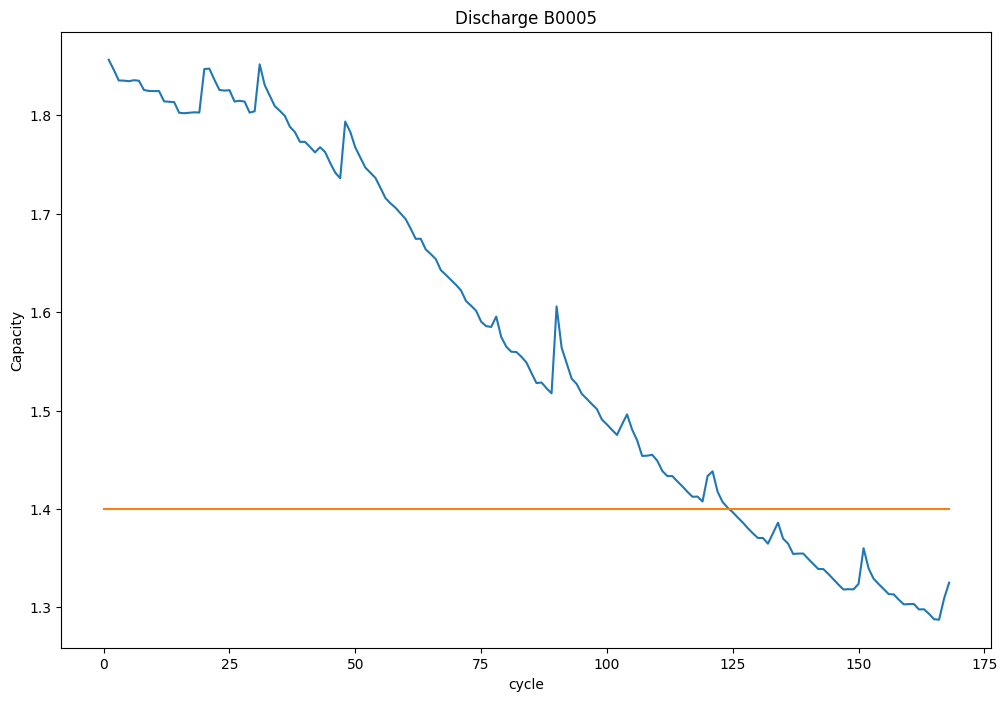

In [4]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [5]:
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.856487  1.000000
1      2 2008-04-02 19:43:48  1.846327  0.994527
2      3 2008-04-03 00:01:06  1.835349  0.988614
3      4 2008-04-03 04:16:37  1.835263  0.988567
4      5 2008-04-03 08:33:25  1.834646  0.988235


Text(0.5, 1.0, 'Discharge B0005')

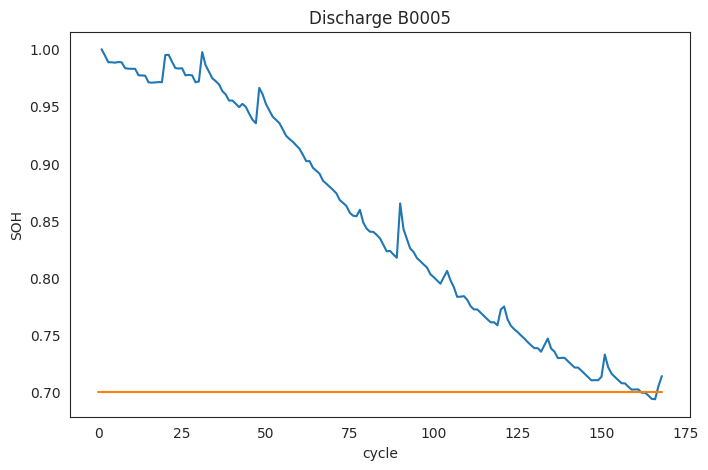

In [6]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

#### Training:

Relevant characteristics of the data filtered are as follows:

- Battery Capacity
- Voltage
- Current
- Temperature
- Charging Voltage
- Charging Current
- Instant of Time

For the output data, the SoH of the battery is calculated and in both input and output cases, the values are normalized to a range of values between [0-1].


In [7]:
C = dataset['capacity'][0]
soh = []

for i in range(len(dataset)):
    soh.append([dataset['capacity'][i] / C])
soh = pd.DataFrame(data=soh, columns=['SoH'])

attribs = ['capacity', 'voltage_measured', 'current_measured',
           'temperature_measured', 'current_load', 'voltage_load', 'time']

train_dataset = dataset[attribs]
sc = MinMaxScaler(feature_range=(0, 1))
train_dataset = sc.fit_transform(train_dataset)

print(train_dataset.shape, soh.shape)

(50285, 7) (50285, 1)


/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GRU
from tensorflow.keras.optimizers import Adam

In [9]:
model = Sequential([
    Dense(8, activation='relu', input_dim=train_dataset.shape[1]),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dropout(rate=0.25),
    Dense(1)
])

model.summary()

model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 217 (868.00 Byte)
Trainable params: 217 (868.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-02 23:09:06.157712: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
history = model.fit(train_dataset, soh.to_numpy(), batch_size=16, epochs=50)

Epoch 1/50
3143/3143 [==============================] - 2s 654us/step - loss: 0.0618
Epoch 2/50
3143/3143 [==============================] - 2s 609us/step - loss: 0.0249
Epoch 3/50
3143/3143 [==============================] - 2s 657us/step - loss: 0.0240
Epoch 4/50
3143/3143 [==============================] - 2s 639us/step - loss: 0.0236
Epoch 5/50
3143/3143 [==============================] - 2s 670us/step - loss: 0.0236
Epoch 6/50
3143/3143 [==============================] - 2s 632us/step - loss: 0.0234
Epoch 7/50
3143/3143 [==============================] - 2s 627us/step - loss: 0.0232
Epoch 8/50
3143/3143 [==============================] - 2s 620us/step - loss: 0.0234
Epoch 9/50
3143/3143 [==============================] - 2s 615us/step - loss: 0.0233
Epoch 10/50
3143/3143 [==============================] - 2s 639us/step - loss: 0.0230
Epoch 11/50
3143/3143 [==============================] - 2s 619us/step - loss: 0.0231
Epoch 12/50
3143/3143 [==============================] - 2s 625

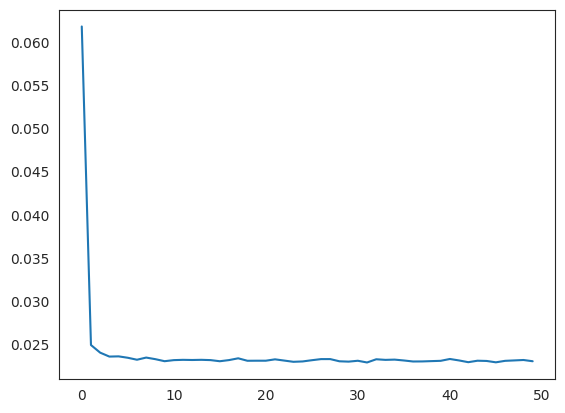

In [12]:
plt.plot(history.history['loss'])

In [13]:
dataset_val, capacity_val = load_data('B0006')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity']) / C
print(dataset_val.head(5))
print(dis_ele.head(5))

Total data in dataset:  616
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  2.035338          4.179800   
1      1                   24 2008-04-02 15:25:41  2.035338          4.179823   
2      1                   24 2008-04-02 15:25:41  2.035338          3.966528   
3      1                   24 2008-04-02 15:25:41  2.035338          3.945886   
4      1                   24 2008-04-02 15:25:41  2.035338          3.930354   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.002366             24.277568       -0.0006         0.000   0.000  
1          0.000434             24.277073       -0.0006         4.195  16.781  
2         -2.014242             24.366226       -1.9990         3.070  35.703  
3         -2.008730             24.515123       -1.9990         3.045  53.781  
4         -2.013381             24.676053       -1.9990         3.026  71.922  
   cy

In [14]:
attrib = ['capacity', 'voltage_measured', 'current_measured',
            'temperature_measured', 'current_load', 'voltage_load', 'time']
soh_pred = model.predict(sc.fit_transform(dataset_val[attrib]))
print(soh_pred.shape)

C = dataset_val['capacity'][0]
soh = []
for i in range(len(dataset_val)):
  soh.append(dataset_val['capacity'][i] / C)
new_soh = dataset_val.loc[(dataset_val['cycle'] >= 1), ['cycle']]
new_soh['SoH'] =  soh
new_soh['NewSoH'] = soh_pred
new_soh = new_soh.groupby(['cycle']).mean().reset_index()
print(new_soh.head(10))
rms = np.sqrt(mean_squared_error(new_soh['SoH'], new_soh['NewSoH']))
print('Root Mean Square Error: ', rms)

 215/1572 [===>..........................] - ETA: 0s

/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

1572/1572 [==============================] - 1s 487us/step
(50285, 1)
   cycle       SoH    NewSoH
0      1  1.000000  0.979785
1      2  0.994990  0.976524
2      3  0.989185  0.972697
3      4  0.989165  0.972676
4      5  0.982898  0.968526
5      6  0.989467  0.972873
6      7  0.989075  0.972628
7      8  0.967304  0.958252
8      9  0.966997  0.958041
9     10  0.961625  0.954488
Root Mean Square Error:  0.07711034024025866


/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

Text(0.5, 1.0, 'Discharge B0006')

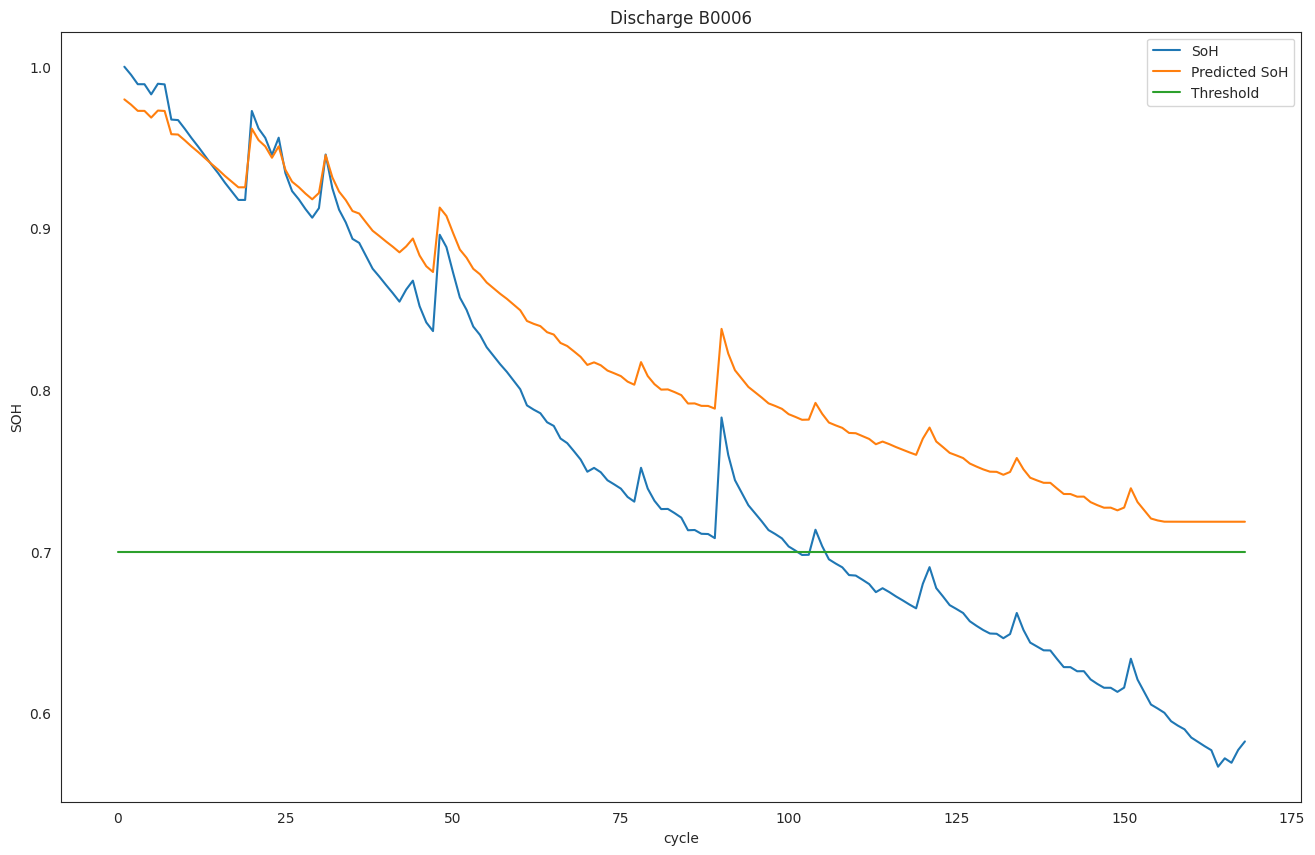

In [15]:
plot_df = new_soh.loc[(new_soh['cycle']>=1),['cycle','SoH', 'NewSoH']]
sns.set_style("white")
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['SoH'], label='SoH')
plt.plot(plot_df['cycle'], plot_df['NewSoH'], label='Predicted SoH')
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70], label='Threshold')
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0006')

For the estimation of SoH, it can be seen that the data pattern is learned by the model correctly, as predicted by the theory, since the shape of the curves is almost identical. The SoH shown has the same behavior as expected in theory, which is corroborated with the root mean square error value of the graph, whose value of 9% is very similar to that found previously. This reaffirms the precision when making the prediction.


#### RUL estimation

In the same way that was done for the estimation of SoH, the training and testing dataset is prepared, in this particular case the battery capacity data is used using the first data of the first 50 cycles to predict the capacity in the following cycles in such a way as to be able to know when the threshold of the battery is reached and estimate the remaining cycles to reach the End of Life of the battery


In [16]:
dataset_val, capacity_val = load_data('B0005')
attrib = ['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
rows = ['cycle','capacity']
dataset = dis_ele[rows]
data_train = dataset[(dataset['cycle']<50)]
data_set_train = data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=50)]
data_set_test = data_test.iloc[:,1:2].values

sc = MinMaxScaler(feature_range=(0,1))
data_set_train = sc.fit_transform(data_set_train)
data_set_test = sc.transform(data_set_test)

X_train, y_train = [], []

#take the last 10t to predict 10t+1
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Total data in dataset:  616


In [30]:
regressor = Sequential([
    GRU(200, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    GRU(200, return_sequences=True),
    Dropout(0.3),
    GRU(200, return_sequences=True),
    Dropout(0.3),
    GRU(200),
    Dropout(0.3),
    Dense(1)
])

regressor.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_squared_error')
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 200)           121800    
                                                                 
 dropout_5 (Dropout)         (None, 10, 200)           0         
                                                                 
 gru_1 (GRU)                 (None, 10, 200)           241200    
                                                                 
 dropout_6 (Dropout)         (None, 10, 200)           0         
                                                                 
 gru_2 (GRU)                 (None, 10, 200)           241200    
                                                                 
 dropout_7 (Dropout)         (None, 10, 200)           0         
                                                                 
 gru_3 (GRU)                 (None, 200)              

In [31]:
history = regressor.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200


3/3 [==============================] - 4s 19ms/step - loss: 0.1996
Epoch 2/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0425
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0468
Epoch 4/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0495
Epoch 5/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0341
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0380
Epoch 7/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0357
Epoch 8/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0325
Epoch 9/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0356
Epoch 10/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0295
Epoch 11/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0370
Epoch 12/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0445
Epoch 13/200
3/3 [==============================] - 0s 23ms/s

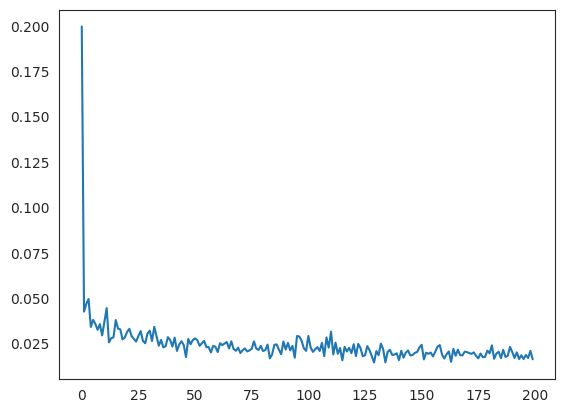

In [32]:
plt.plot(history.history['loss'])

In [33]:
print(len(data_test))
data_total = pd.concat((data_train['capacity'], data_test['capacity']),axis=0)
inputs = data_total[len(data_total)-len(data_test)-10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

119


In [34]:
X_test = []
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred = regressor.predict(X_test)
print(pred.shape)
pred = sc.inverse_transform(pred)
pred = pred[:,0]

tests = data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)
metrics.r2_score(tests,pred)

4/4 [==============================] - 1s 10ms/step
(119, 1)
Test RMSE: 0.135


/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

-0.0014705288735388233

/tmp/ipykernel_783734/1198164500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pre']=pred


Text(0.5, 1.0, 'Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

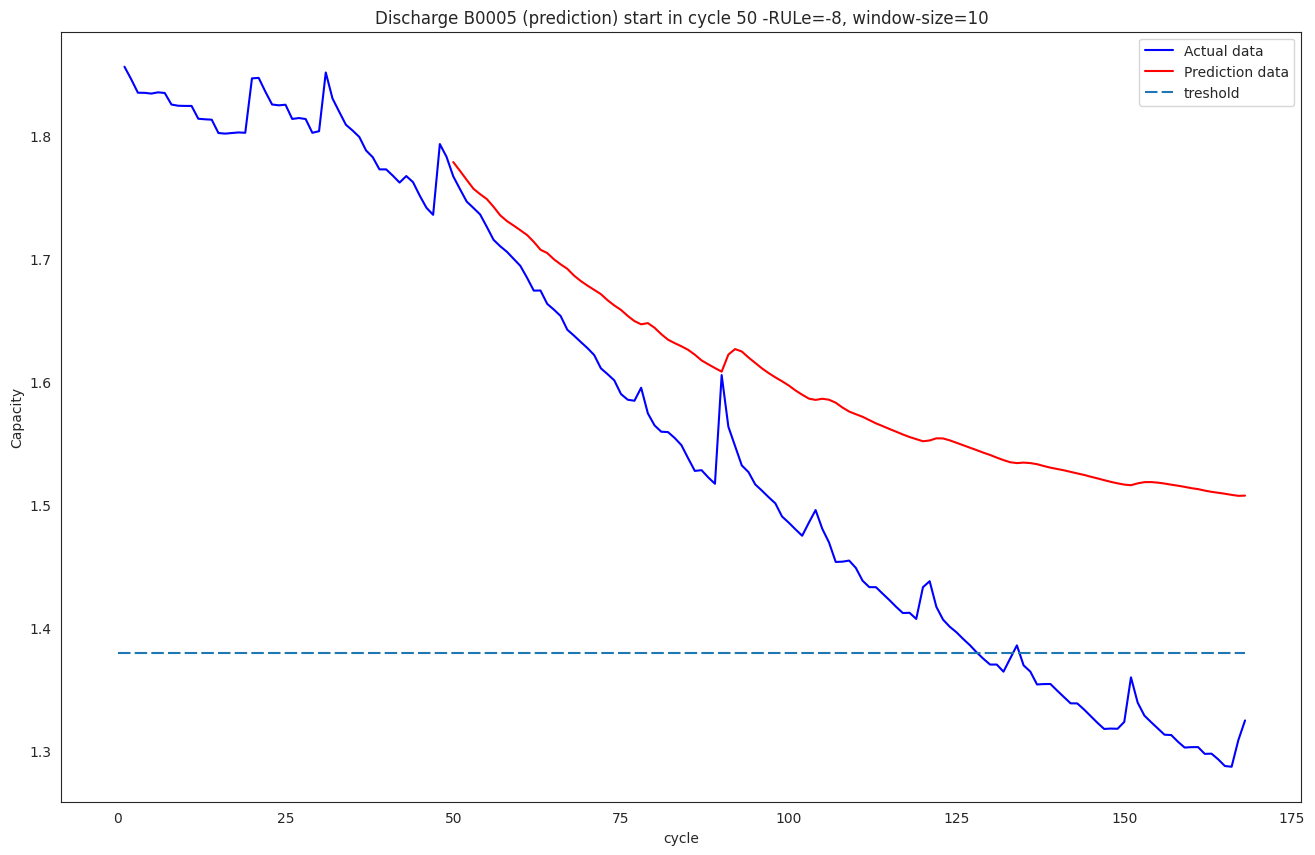

In [35]:
ln = len(data_train)
data_test['pre']=pred
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','capacity']]
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

In [37]:
pred, Afil, Pfil = 0, 0, 0
a = data_test['capacity'].values
b = data_test['pre'].values

j, k = 0, 0

for i in range(len(a)):
    actual = a[i]
    
    if actual <= 1.38:
        j = i
        Afil = j
        break

for i in range(len(a)):
    pred = b[i]
    if pred < 1.38:
        k = i
        Pfil = k
        break

print("The Actual fail at cycle number:", str(Afil+ln))
print("The prediction fail at cycle number:", str(Pfil+ln))
RULerror = Pfil - Afil
print("The error of RUL=", str(RULerror), "Cycle(s)")

The Actual fail at cycle number: 128
The prediction fail at cycle number: 49
The error of RUL= -79 Cycle(s)
